<a href="https://colab.research.google.com/github/victoriamaccari/proyecto/blob/master/Actividad%20guiada%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ACTIVIDAD GUIADA N°1

## Carga de datos

In [1]:
#Importar librerías
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [2]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [3]:
train = upload_files(['city', 'weekofyear', 'year'])
train.head()

Saving dengue_features_train (1).csv to dengue_features_train (1).csv
User uploaded file "dengue_features_train (1).csv" with length 287139 bytes


week_start_date  ...  station_precip_mm
city weekofyear year                  ...                   
sj   18         1990      1990-04-30  ...               16.0
     19         1990      1990-05-07  ...                8.6
     20         1990      1990-05-14  ...               41.4
     21         1990      1990-05-21  ...                4.0
     22         1990      1990-05-28  ...                5.8

[5 rows x 21 columns]

In [10]:
train.drop("week_start_date", axis = 1, inplace = True)
train.head()

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city weekofyear year                      ...                                       
sj   18         1990  0.122600  0.103725  ...                20.0               16.0
     19         1990  0.169900  0.142175  ...                22.2                8.6
     20         1990  0.032250  0.172967  ...                22.8               41.4
     21         1990  0.128633  0.245067  ...                23.3                4.0
     22         1990  0.196200  0.262200  ...                23.9                5.8

[5 rows x 20 columns]

In [63]:
print(train["ndvi_ne"])

city  weekofyear  year
sj    18          1990    0.122600
      19          1990    0.169900
      20          1990    0.032250
      21          1990    0.128633
      22          1990    0.196200
      23          1990    0.196200
      24          1990    0.112900
      25          1990    0.072500
      26          1990    0.102450
      27          1990    0.102450
      28          1990    0.192875
      29          1990    0.291600
      30          1990    0.150567
      31          1990    0.150567
      32          1990    0.150567
      33          1990    0.150567
      34          1990    0.190233
      35          1990    0.252900
      36          1990    0.235400
      37          1990    0.127967
      38          1990    0.196350
      39          1990    0.116100
      40          1990    0.228550
      41          1990    0.171150
      42          1990    0.171150
      43          1990    0.146200
      44          1990    0.252250
      45          1990    0.1526

##Preproceso

In [11]:
train.shape

(1456, 20)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, ('sj', 18, 1990) to ('iq', 25, 2010)
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ndvi_ne                                1456 non-null   float64
 1   ndvi_nw                                1456 non-null   float64
 2   ndvi_se                                1456 non-null   float64
 3   ndvi_sw                                1456 non-null   float64
 4   precipitation_amt_mm                   1456 non-null   float64
 5   reanalysis_air_temp_k                  1456 non-null   float64
 6   reanalysis_avg_temp_k                  1456 non-null   float64
 7   reanalysis_dew_point_temp_k            1456 non-null   float64
 8   reanalysis_max_air_temp_k              1456 non-null   float64
 9   reanalysis_min_air_temp_k              1456 non-null   float64
 10  reanalysis_precip_amt_kg_per_m2        1456 n

In [13]:
train.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.131271,0.128068,0.202606,0.201987,45.686937,298.697965,299.221483,295.245445,303.419505,295.719712,40.111635,82.176203,45.686937,16.745565,4.898656,27.180313,8.085646,32.443338,22.099863,39.194162
std,0.138527,0.119561,0.074409,0.083592,43.779318,1.361950,1.262676,1.527527,3.233030,2.559398,43.329174,7.161016,43.779318,1.542276,3.542340,1.280861,2.122836,1.960769,1.569113,47.363305
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.039100,0.048250,0.152795,0.144455,9.655000,297.654643,298.257143,294.119643,301.000000,293.900000,13.085000,77.185714,9.655000,15.560000,2.328571,26.300000,6.528571,31.100000,21.100000,8.700000
50%,0.113900,0.115926,0.195664,0.190121,38.235000,298.646429,299.285714,295.639286,302.400000,296.200000,27.245000,80.301429,38.235000,17.087143,2.857143,27.400000,7.364286,32.800000,22.200000,23.800000
75%,0.232018,0.213429,0.247461,0.246775,70.227500,299.827500,300.207143,296.460000,305.500000,297.900000,52.200000,86.406429,70.227500,17.977500,7.617857,28.132143,9.600000,33.900000,23.300000,53.675000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [17]:
#valores perdidos
pd.isnull(train).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

In [15]:
#Total de valores perdidos por columna
train.isnull().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

In [32]:
#Metodo fillna, asigna el valor previo o el ultimo valor valido
train.fillna(method='ffill', inplace=True)

### Deteccion de outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f259bc61438>],
 'caps': [<matplotlib.lines.Line2D at 0x7f259bc61e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f259bc76908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f259bc76588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f259bc61748>,
  <matplotlib.lines.Line2D at 0x7f259bc61ac8>]}

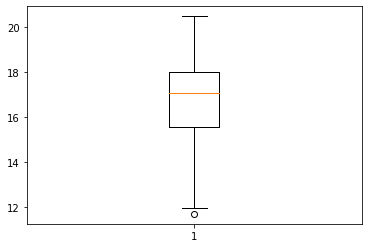

In [33]:
plt.boxplot(train['reanalysis_specific_humidity_g_per_kg'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f2593b52da0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2593adf7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2593ae92b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2593adfef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2593adf0f0>,
  <matplotlib.lines.Line2D at 0x7f2593adf470>]}

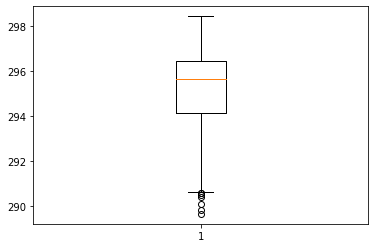

In [34]:
plt.boxplot(train['reanalysis_dew_point_temp_k'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f2593abea58>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2593acc4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2593accf28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2593accba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2593abed68>,
  <matplotlib.lines.Line2D at 0x7f2593acc128>]}

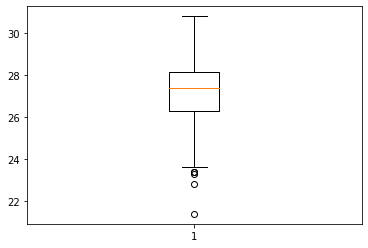

In [35]:
plt.boxplot(train['station_avg_temp_c'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f2593a4f400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2593a4fe10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f25939db8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f25939db550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2593a4f710>,
  <matplotlib.lines.Line2D at 0x7f2593a4fa90>]}

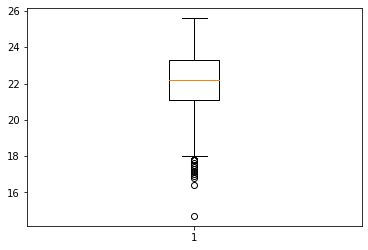

In [37]:
plt.boxplot(train['station_min_temp_c'])

In [42]:

#IQR para cada columna
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


ndvi_ne                                   0.192918
ndvi_nw                                   0.165179
ndvi_se                                   0.094666
ndvi_sw                                   0.102320
precipitation_amt_mm                     60.572500
reanalysis_air_temp_k                     2.172857
reanalysis_avg_temp_k                     1.950000
reanalysis_dew_point_temp_k               2.340357
reanalysis_max_air_temp_k                 4.500000
reanalysis_min_air_temp_k                 4.000000
reanalysis_precip_amt_kg_per_m2          39.115000
reanalysis_relative_humidity_percent      9.220714
reanalysis_sat_precip_amt_mm             60.572500
reanalysis_specific_humidity_g_per_kg     2.417500
reanalysis_tdtr_k                         5.289286
station_avg_temp_c                        1.832143
station_diur_temp_rng_c                   3.071429
station_max_temp_c                        2.800000
station_min_temp_c                        2.200000
station_precip_mm              

In [20]:
BI=(train < (Q1 - 1.5 * IQR)) 
print(BI)

                      ndvi_ne  ndvi_nw  ...  station_min_temp_c  station_precip_mm
city weekofyear year                    ...                                       
sj   18         1990    False    False  ...               False              False
     19         1990    False    False  ...               False              False
     20         1990    False    False  ...               False              False
     21         1990    False    False  ...               False              False
     22         1990    False    False  ...               False              False
...                       ...      ...  ...                 ...                ...
iq   21         2010    False    False  ...               False              False
     22         2010    False    False  ...               False              False
     23         2010    False    False  ...               False              False
     24         2010    False    False  ...               False              False
    

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
BS=(train > (Q3 + 1.5 * IQR))
print(BS)

                      ndvi_ne  ndvi_nw  ndvi_se  ndvi_sw  \
city weekofyear year                                       
sj   18         1990    False    False    False    False   
     19         1990    False    False    False    False   
     20         1990    False    False    False    False   
     21         1990    False    False    False    False   
     22         1990    False    False    False    False   
     23         1990    False    False    False    False   
     24         1990    False    False    False    False   
     25         1990    False    False    False    False   
     26         1990    False    False    False    False   
     27         1990    False    False    False    False   
     28         1990    False    False    False    False   
     29         1990    False    False    False    False   
     30         1990    False    False    False    False   
     31         1990    False    False    False    False   
     32         1990    False    False  

In [44]:
#Quito los outliers
train_out = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out.shape

(1200, 20)

In [46]:
#normalizar la base de datos
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(train_out)
print(features_norm)

[[0.49708395 0.43187628 0.47321642 ... 0.21568627 0.26315789 0.13266998]
 [0.56123695 0.49740116 0.3727376  ... 0.44117647 0.55263158 0.07131012]
 [0.37454225 0.54987509 0.35839401 ... 0.49019608 0.63157895 0.34328358]
 ...
 [0.66588512 0.50401687 0.61749449 ... 0.49019608 0.15789474 0.06135987]
 [0.78368954 0.67394581 0.69684189 ... 0.39215686 0.39473684 0.13266998]
 [0.73523084 0.65213258 0.68384919 ... 0.6372549  0.55263158 0.16915423]]


## PCA para seleccionar variables

In [49]:
#2. PCA Estimation
from sklearn.decomposition import PCA
estimator = PCA (n_components = 3)
X_pca = estimator.fit_transform(features_norm)
X_pca

array([[-0.58625343,  0.58140521, -0.18736857],
       [-0.40107631,  0.17510997, -0.00900712],
       [-0.21231308, -0.12500667, -0.15924362],
       ...,
       [ 0.38894168,  0.57288772, -0.36496564],
       [ 0.62736566,  0.60024666, -0.28916701],
       [ 0.82746286,  0.28293493,  0.20502797]])

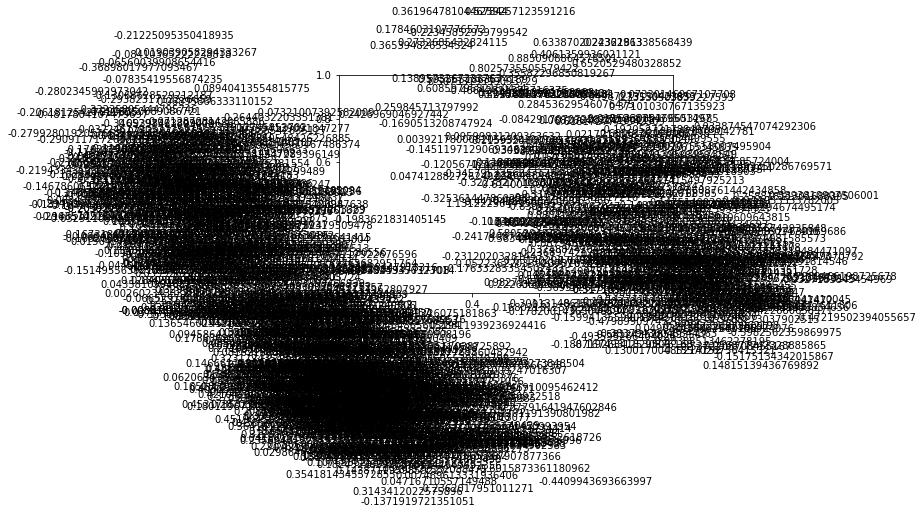

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], X_pca[i][2])

## Clustering jerárquico